# Introduction 

The data set has tweet that relation with Covid - 19, also has a label for tweet type that 

*The content predict the positive, negative, neutral, extremely positive, extremely Negative tweets type with NLP.* 

# Content

* Importing libraries
* Load to data 
* Trying to understand data 
* Visualization to percantage tweet types general
* Analyzing the tweets type location that more than has 100 tweets
  * Detecthing location that has more than 100 tweets 
  * Create new data frame for tweets type that has more than 100 tweets
  * Filling the data frame that we created
  * Visualization to percantage tweets type for Covid 19 by location that has more than 100 tweets
* NLP(Natural Language Processing) Processes
    * Pick the indices for testing preprocessing processes 
      * Remove the ırrevelant strings(: , :) , ! , //...) and convert the lower case
      * Tokinenize to text 
      * Lemmization all words, and convert again text form
    * Create a new data frame for tweet types and tweets
    * Data cleaning   
        * Dropping NaN values
        * The processes that we testing on one indices implement on data.
        * Remove the stopwords and implement the countvectorizer
        * Bag of words 
        * Encoding labels with LabelEncoder method
        * The most use words, with data visiulazation
* Splitting to train and test data
* Learning Time!
  * Logistic Regression
* Confusion matrix

# Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
import warnings
import warnings
warnings.filterwarnings('ignore')

# Load to data 

In [2]:
df = pd.read_csv('Corona_NLP.csv' , encoding = 'latin1')

# Trying to understand data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [4]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
df.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [6]:
# control the NaN values 
df.isnull().sum()
df.dropna(axis = 0 , inplace = True)

In [7]:
# loc variable for number of twits by location
loc = df.Location.value_counts()

In [8]:
loc = pd.DataFrame(loc)

In [9]:
loc

,Location
London,540
United States,528
"London, England",520
"New York, NY",395
"Washington, DC",373
...,...
"North Richland Hills, TX",1
"KS,USA",1
"Campbell, California, USA",1
London/Highlands,1


# Visualization to percantage tweet types general 

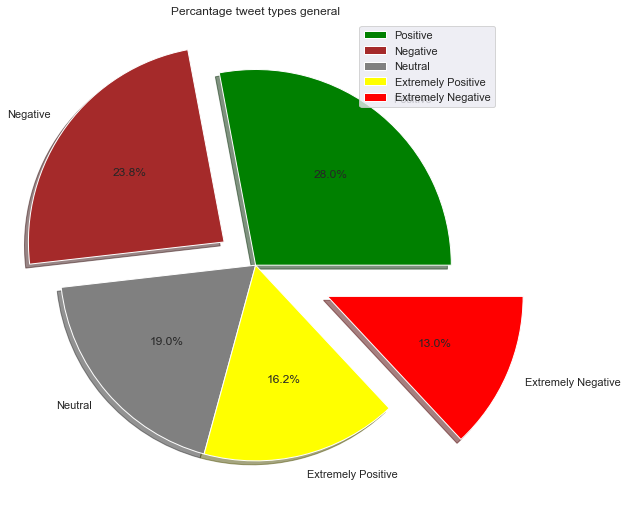

In [99]:
# create a list for labels
labels = ['Positive' , 'Negative', 'Neutral', 'Extremely Positive' , 'Extremely Negative']

# create color list for charts
color = ['green' , 'brown' , 'gray' , 'yellow' , 'red']

explode = (0.0 , 0.2, 0.0, 0.0, 0.4)
plt.pie(df.Sentiment.value_counts() , labels = labels , colors = color , explode = explode, shadow = True , autopct = '%1.1f%%')
plt.title('Percantage tweet types general')
plt.legend(loc = 'best')
plt.show()

In [11]:
df.Sentiment.value_counts()

Positive              9110
Negative              7763
Neutral               6172
Extremely Positive    5273
Extremely Negative    4249
Name: Sentiment, dtype: int64

# Analyzing the tweets type location that more than has 100 tweets

### Detecthing location that has more than 100 tweets

In [12]:
loc_first_100 = loc[loc['Location'] > 100]

In [13]:
loc_first_100

,Location
London,540
United States,528
"London, England",520
"New York, NY",395
"Washington, DC",373
United Kingdom,337
"Los Angeles, CA",281
India,268
UK,232
Australia,225


* List of location with at least 100 tweets
* We will analyz the Covid-19 reaction that the locations

### Create new data frame for tweets type that has more than 100 tweets

In [14]:
# create list for locations 
loc_indices = loc_first_100.index

In [15]:
loc_indices 

Index(['London', 'United States', 'London, England', 'New York, NY',
       'Washington, DC', 'United Kingdom', 'Los Angeles, CA', 'India', 'UK',
       'Australia', 'USA', 'England, United Kingdom', 'Canada',
       'Toronto, Ontario', 'Global', 'Chicago, IL', 'California, USA',
       'San Francisco, CA', 'Boston, MA', 'New York, USA', 'New Delhi, India',
       'Atlanta, GA', 'New York', 'Mumbai, India', 'Worldwide'],
      dtype='object')

In [16]:
# create new data frame for reaction twits that more than has 100 location
df_reaction = pd.DataFrame(columns = ['Location' , 'Neutral' , 'Positive' , 'Negative' , 'Extremely Positive' , 
                                     'Extremely Negative'])

In [17]:
# add the location that has more than 100 twits
df_reaction.Location = loc_indices
df_reaction

,Location,Neutral,Positive,Negative,Extremely Positive,Extremely Negative
0,London,NaN,NaN,NaN,NaN,NaN
1,United States,NaN,NaN,NaN,NaN,NaN
2,"London, England",NaN,NaN,NaN,NaN,NaN
3,"New York, NY",NaN,NaN,NaN,NaN,NaN
4,"Washington, DC",NaN,NaN,NaN,NaN,NaN
5,United Kingdom,NaN,NaN,NaN,NaN,NaN
6,"Los Angeles, CA",NaN,NaN,NaN,NaN,NaN
7,India,NaN,NaN,NaN,NaN,NaN
8,UK,NaN,NaN,NaN,NaN,NaN
9,Australia,NaN,NaN,NaN,NaN,NaN


### Filling the data frame that we created

In [18]:
# create sentiment list for twit types
sentiment_list = df.Sentiment.unique()
sentiment_list

array(['Neutral', 'Positive', 'Negative', 'Extremely Positive',
       'Extremely Negative'], dtype=object)

In [19]:
for i , j  in zip(loc_indices , range(25)):
    
    for m in sentiment_list:
        
        df_reaction.loc[j,'{}'.format(m)] = df[(df['Location'] == '{}'.format(i)) & 
                                           (df['Sentiment'] == '{}'.format(m))].Sentiment.count()
df_reaction

,Location,Neutral,Positive,Negative,Extremely Positive,Extremely Negative
0,London,105,157,134,70,74
1,United States,112,154,107,91,64
2,"London, England",107,144,114,74,81
3,"New York, NY",93,102,83,71,46
4,"Washington, DC",56,114,83,68,52
5,United Kingdom,51,101,86,52,47
6,"Los Angeles, CA",63,78,63,52,25
7,India,52,67,75,49,25
8,UK,45,59,54,41,33
9,Australia,50,64,57,23,31


### Visualization to tweets type for Covid 19 by location that has more than 100 tweets

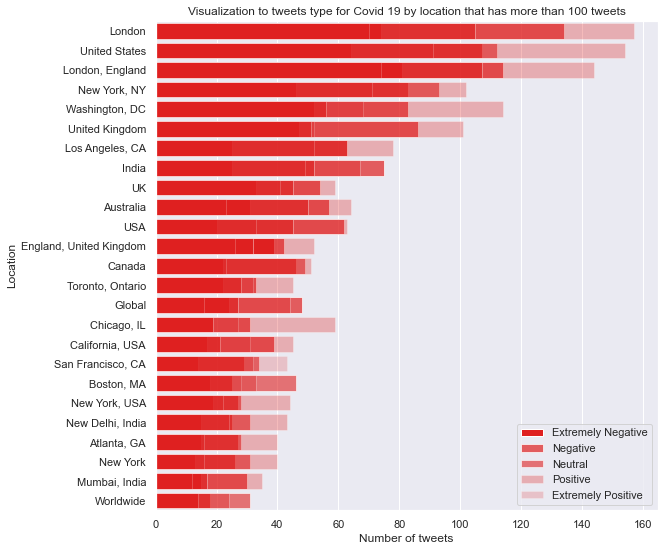

In [98]:
sns.set(rc={'figure.figsize':(9,9)})
sns.barplot(x = 'Extremely Negative' , y = 'Location' , data = df_reaction , color = 'red' , alpha = 1 , label = 'Extremely Negative')
sns.barplot(x = 'Negative' , y = 'Location' , data = df_reaction , color = 'red' , alpha = 0.7 , label = 'Negative')
sns.barplot(x = 'Neutral' , y = 'Location' , data = df_reaction , color = 'red' , alpha = 0.6 , label = 'Neutral')
sns.barplot(x = 'Positive' , y = 'Location' , data = df_reaction , color = 'red' , alpha = 0.3 , label = 'Positive')
sns.barplot(x = 'Extremely Positive' , y = 'Location' , data = df_reaction , color = 'red' , alpha = 0.2 , label = 'Extremely Positive')
plt.legend(loc = 'best')
plt.title('Visualization to tweets type for Covid 19 by location that has more than 100 tweets')
plt.xlabel('Number of tweets')
plt.ylabel('Location')
plt.show()

* *In locations where Twitter is used a lot, we analized to Covid 19 Effecths, we couldnt generally analyze because the data has a lot of locations and not avaliable for visualization.*
* Our prime purpose that are analyzing to negative tweets effecths by a location.
* As we can see negatives types tweets dominanter than the other types. 

# NLP(Natural Language Processing) Processes

### Pick the indices for testing preprocessing processes

In [21]:
df.OriginalTweet.head(20)

0     @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1     advice Talk to your neighbours family to excha...
2     Coronavirus Australia: Woolworths to give elde...
5     As news of the regionÂs first confirmed COVID...
6     Cashier at grocery store was sharing his insig...
7     Was at the supermarket today. Didn't buy toile...
8     Due to COVID-19 our retail store and classroom...
9     For corona prevention,we should stop to buy th...
10    All month there hasn't been crowding in the su...
11    Due to the Covid-19 situation, we have increas...
12    #horningsea is a caring community. LetÂs ALL ...
13    Me: I don't need to stock up on food, I'll jus...
15    Lines at the grocery store have been unpredict...
16    ????? ????? ????? ????? ??\r\r\n?????? ????? ?...
17    @eyeonthearctic 16MAR20 Russia consumer survei...
18    Amazon Glitch Stymies Whole Foods, Fresh Groce...
19    For those who aren't struggling, please consid...
20    with 100  nations inficted with  covid  19

* We picked to indice 5 the indice that avaliable for testing processes

In [22]:
test_tweet = df.OriginalTweet[5]
test_tweet

'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU'

### Remove the ırrevelant strings(: , :) , ! , //...) and convert the lower case

In [100]:
import re 
test_tweet = re.sub("[^a-zA-Z]" , " " , test_tweet)
test_tweet = re.sub(r'http', " ", test_tweet)
test_tweet = test_tweet.lower()
test_tweet

'a news of the region s first confirmed covid case came out of sullivan county last week people flocked to area store to purchase cleaning supply hand sanitizer food toilet paper and other good tim dodson report   t co cfxch a lu'

* As we can see removed to ırrevelant strings.

### Tokinenize to text

In [24]:
import nltk 
test_tweet = nltk.word_tokenize(test_tweet)
test_tweet

['as',
 'news',
 'of',
 'the',
 'region',
 's',
 'first',
 'confirmed',
 'covid',
 'case',
 'came',
 'out',
 'of',
 'sullivan',
 'county',
 'last',
 'week',
 'people',
 'flocked',
 'to',
 'area',
 'stores',
 'to',
 'purchase',
 'cleaning',
 'supplies',
 'hand',
 'sanitizer',
 'food',
 'toilet',
 'paper',
 'and',
 'other',
 'goods',
 'tim',
 'dodson',
 'reports',
 'https',
 't',
 'co',
 'cfxch',
 'a',
 'lu']

* As we can see we tokinized to words in tweet.
* We will prepare the lemmization processes

### Lemmization all words, and convert again text form

In [25]:
lemma = nltk.WordNetLemmatizer()
test_tweet = [lemma.lemmatize(word) for word in test_tweet]
test_tweet
test_tweet = " ".join(test_tweet) # converting text form
print(test_tweet)

a news of the region s first confirmed covid case came out of sullivan county last week people flocked to area store to purchase cleaning supply hand sanitizer food toilet paper and other good tim dodson report http t co cfxch a lu


* After the lemmization processes we can see 'reports -> report'.  
* The process that calling Lemmization process we converted to tweet type again.

# Create a new data frame for tweet types and tweets

In [26]:
data = pd.concat([df.OriginalTweet , df.Sentiment] , axis = 1)

In [27]:
data

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
5,As news of the regionÂs first confirmed COVID...,Positive
6,Cashier at grocery store was sharing his insig...,Positive
...,...,...
41147,YÂall really shitting that much more at home?...,Negative
41149,Still shocked by the number of #Toronto superm...,Negative
41150,I never that weÂd be in a situation &amp; wor...,Positive
41152,Airline pilots offering to stock supermarket s...,Neutral


# Data cleaning

### Dropping NaN values

In [28]:
# control the nan values 
data.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

* We dont have to dropping processes because the data has no NaN values.

### The processes that we testing on one indices implement on data.

In [29]:
# create a list for tweets
tweet_list = []

# Data cleaning 
for tweet in data.OriginalTweet:
    
    # Remove ırrevelant strings and convert the lower case
    tweet = re.sub("[^a-zA-Z]" , " " , tweet)
    tweet = re.sub(r'http\S+', " ", tweet)
    tweet = tweet.lower()
    
    # tokinize the tweet
    tweet = nltk.word_tokenize(tweet)
    
    # lemmization processes
    tweet = [lemma.lemmatize(word) for word in tweet]
    tweet = " ".join(tweet) # converting text form
    
    # appending the tweet that cleaned 
    tweet_list.append(tweet)
    
tweet_list    

['menyrbie phil gahan chrisitv t co ifz fan pa and t co xx ghgfzcc and t co i nlzdxno',
 'advice talk to your neighbour family to exchange phone number create contact list with phone number of neighbour school employer chemist gp set up online shopping account if po adequate supply of regular med but not over order',
 'coronavirus australia woolworth to give elderly disabled dedicated shopping hour amid covid outbreak t co binca vp p',
 'a news of the region s first confirmed covid case came out of sullivan county last week people flocked to area store to purchase cleaning supply hand sanitizer food toilet paper and other good tim dodson report t co cfxch a lu',
 'cashier at grocery store wa sharing his insight on covid to prove his credibility he commented i m in civics class so i know what i m talking about t co iefdnehgdo',
 'wa at the supermarket today didn t buy toilet paper rebel toiletpapercrisis covid t co evxkqlidaz',
 'due to covid our retail store and classroom in atlanta wi

In [78]:
import nltk 
nltk.download('punktr')
nltk.download('stopwords') # Download stopwords(and, or etc..)

from sklearn.feature_extraction.text import CountVectorizer
max_feature = 4000 # number of ensample words that most use 

count_vectorizer = CountVectorizer(max_features = max_feature , stop_words = 'english')

[nltk_data] Error loading punktr: Package 'punktr' not found in index
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erdmk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Bag of words 

In [79]:
sparce_matrix = count_vectorizer.fit_transform(tweet_list).toarray()
sparce_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

* Created to sparce matrix.

*There is a explanation "What is the sparce_matrix?" in README*

### Encoding labels with LabelEncoder method

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data.iloc[:,1] = le.fit_transform(data.iloc[:,1])
data.iloc[:,1]

0        3
1        4
2        4
5        4
6        4
        ..
41147    2
41149    2
41150    4
41152    3
41156    2
Name: Sentiment, Length: 32567, dtype: int64

# Splitting to train and test data 

In [81]:
X = sparce_matrix 
y = data.Sentiment # labels 

In [82]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

# Learning time!

### Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train , y_train)
lr.score(X_test , y_test)

0.6005526558182377

### Testing Scores

In [84]:
from sklearn.metrics import classification_report
lr_prediction = lr.predict(X_test)
print('{}'.format(classification_report(lr_prediction, y_test)))

              precision    recall  f1-score   support

           0       0.58      0.64      0.61       776
           1       0.62      0.70      0.66       909
           2       0.52      0.54      0.53      1480
           3       0.69      0.62      0.65      1392
           4       0.61      0.57      0.59      1957

    accuracy                           0.60      6514
   macro avg       0.60      0.61      0.61      6514
weighted avg       0.60      0.60      0.60      6514



### Confussion Matrix

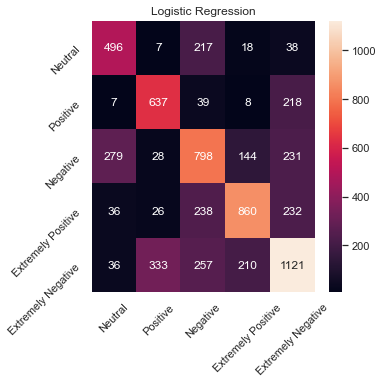

In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(lr_prediction, y_test)

# labels 
labels = df.Sentiment.unique()

# Confusion map
f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm , annot = True , fmt = '.0f')
plt.title('Logistic Regression')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

* The prediction score is 0.60 actually it's enough for NLP algorithms.
* The data has a a lot of distortion for example mentions, links we removed to 'https//' but there is a still some 	remainder  ırrevelant strings from links and mentions for example('report   t co cfxch a lu'').

* *I will make improvement for NLP processes at future* 